In [12]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import Exactrel
import networkx as nx
import copy
import pickle
# "the default sans-serif font is Arial"
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams.update({'font.size': 10})

In [19]:
from scipy import stats

In [6]:
# The cities, nodes represent cities in this order
Cities = ['Houston', 'Dallas', 'Oklahoma City', 'Kansas City', 'Memphis', 'Birmingham', 'New Orleans']
# Define the network through an adjacent matrix
AM = np.array([[0, 1, 0, 0, 0, 0, 1 ], [1, 0, 1, 0, 1, 0, 1], [0, 1, 0, 1, 1, 0, 0], [0, 0, 1, 0, 1, 0, 0],
               [0, 1, 1, 1, 0, 1, 1], [0, 0, 0, 0, 1, 0, 1], [1, 1, 0, 0, 1, 1, 0]])
# Buidl networkx netowrk object from adjacent matrix 
Graph = nx.from_numpy_matrix(AM)
Nodes = list(Graph.nodes())
Edges = list(Graph.edges())
Source = Nodes[4]
Terminal = Nodes[0]

In [7]:
# Preprocess to obtain basic mapping data
# Build edge-index (interger) and index-edge mapping to facilitate event formulation
# Output: dictionary with edge as key and index as value
def edgeindexmap(digraph, source):
    # Visit the edges from the source through BFS, get layers of edges 
    bfsedges = list(nx.edge_bfs(digraph, source))
    edgeindex = {}
    indexedge = {}
    for i in range(len(bfsedges)):
        edgeindex[bfsedges[i]] = i+1
        indexedge[(i+1)] = bfsedges[i]
    return edgeindex, indexedge

In [8]:
# Build index-reliability mapping
# Output: dictionary with index as key and reliability as value
def indexprobmap(edgeindex, edgeprob):
    indexprob = {}
    for edge, index in edgeindex.items():
        try:
            indexprob[index] = edgeprob[edge]
        except:
            (u, v) = edge
            indexprob[index] = edgeprob[(v, u)]
    return indexprob

In [2]:
# Define the indivudual reliability function
def r(t, k):
    return np.exp((1/k-np.exp(-k*t)/k-t)/8)

In [ ]:
# Plot individual r for different t
T = np.linspace(0, 60, 101)
K = np.array([0.1, 0.4, 1.6, 4])
R = np.zeros(len(T))

In [ ]:
# Calculate the exact network reliability for each time instant 
ALLNETR = []
for k in K:
    NETR = np.zeros(len(T))
    for j in range(len(T)):
        # Assign survival probability to each edge
        Rk = r(T[j], k)
        Survivprob = [Rk] * len(Edges)
        # Define a dictionary to represent the link reliability mapping
        Zipobj = zip(Edges, Survivprob)
        Edgessurvivprob = dict(Zipobj)
        Edgeindex, Indexedge = edgeindexmap(Graph, Source)
        Indexprob = indexprobmap(Edgeindex, Edgessurvivprob)
        R1, R2, F = Exactrel.ssp(Graph, Source, Terminal, Edgeindex, Indexedge, Indexprob)
        NETR[j] = R1
    ALLNETR.append(NETR)

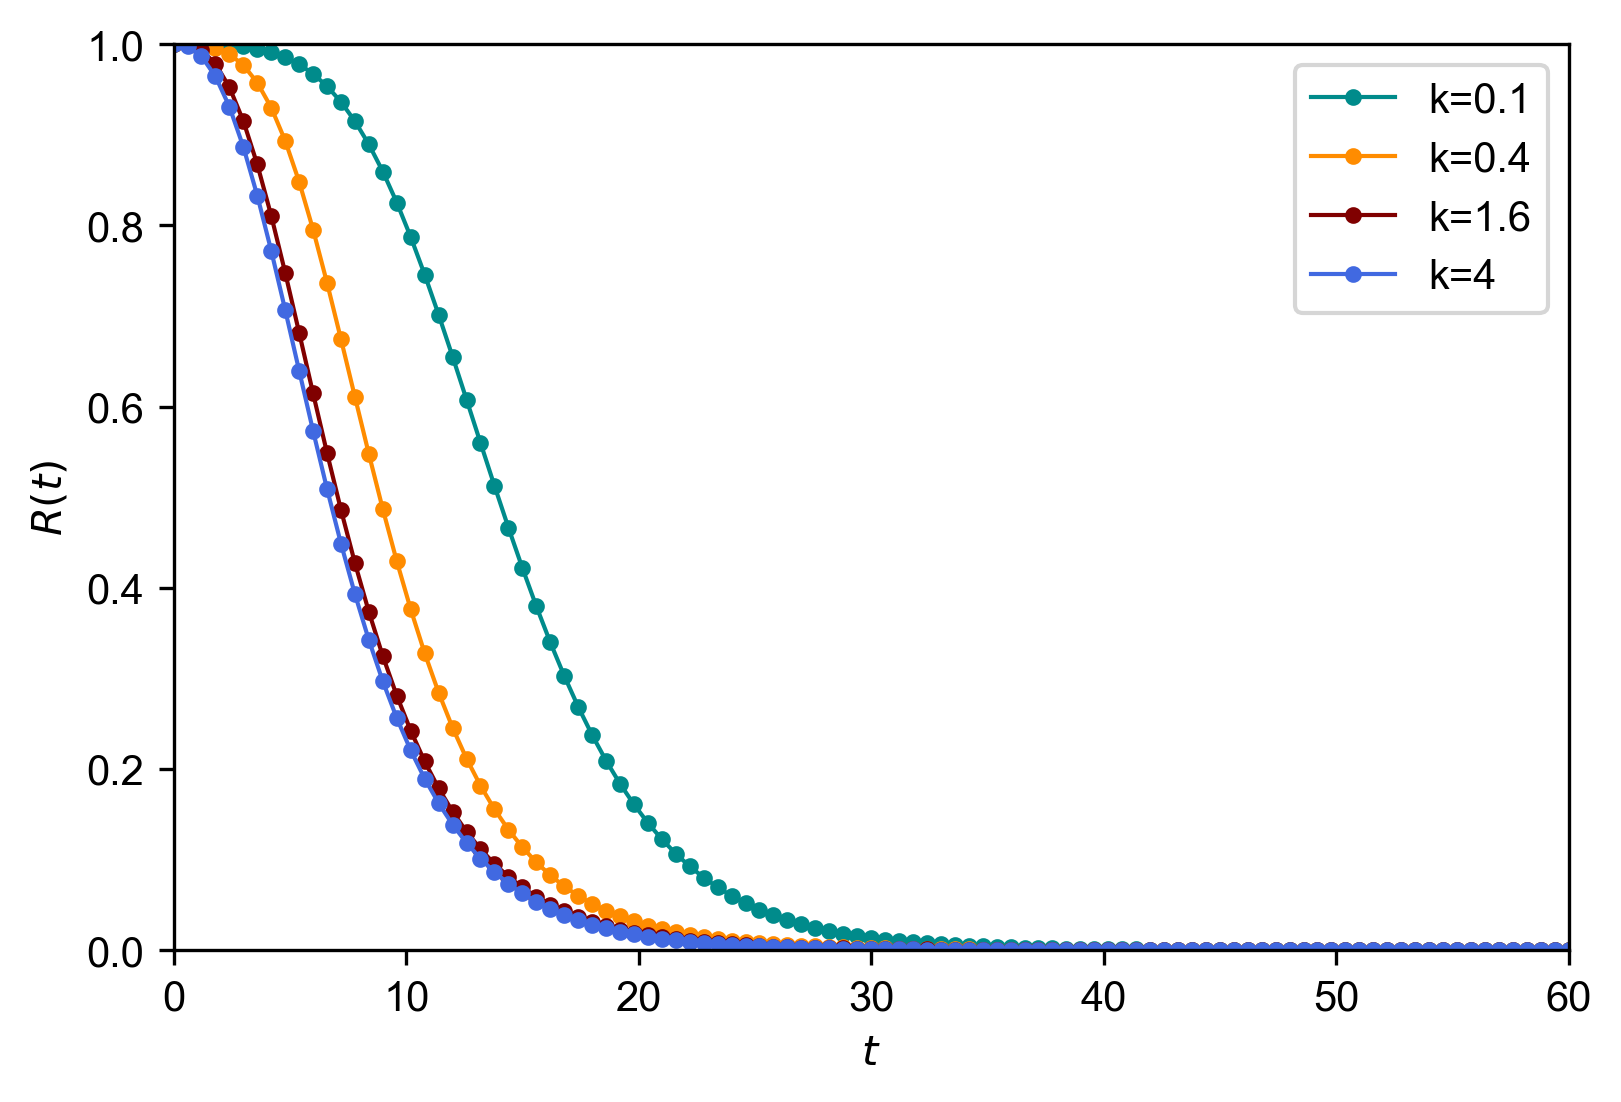

In [11]:
Colors = ['darkcyan', 'darkorange', 'maroon', 'royalblue']
Labels = ['k=0.1', 'k=0.4', 'k=1.6', 'k=4']
for k in range(len(Colors)):
    plt.plot(T, ALLNETR[k], color = Colors[k], linewidth = 1, marker = 'o', 
             label = Labels[k],markersize = 3)
plt.ylim(0, 1)
plt.xlim(0, 60)
plt.legend()
plt.xlabel('$t$')
plt.ylabel('$R(t)$')
plt.rcParams['figure.figsize'] = (6, 4) 
plt.rcParams['savefig.dpi'] = 300 
plt.rcParams['figure.dpi'] = 300 
plt.savefig(r"%s.jpg"%('RKs'), bbox_inches='tight')
plt.show()